In [1]:
from arcgis.gis import *
gis = GIS()

# Symbology/ Visualization
# Access feature attributes
# Recognize and interpret JSON

## https://developers.arcgis.com/python/guide/smart-mapping/

In [ ]:
map1 = gis.map('USA',3)
map1

In [6]:
search_result = gis.content.search('title:USA freeway system AND owner:esri_dm', 
                                  item_type = 'Feature Layer')
search_result

[<Item title:"USA Freeway System" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"USA Freeway System" type:Feature Layer Collection owner:esri_dm>]

In [7]:
freeway_item = search_result[0]
map1.add_layer(freeway_item)
map1

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [8]:
# Use the first layer available on the service.
freeway_feature_layer = freeway_item.layers[0]

# Print the layer's url and field names.
print(freeway_feature_layer.url)
for field in freeway_feature_layer.properties['fields']:
    print(field['name'])

https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Freeway_System/FeatureServer/1
OBJECTID
ROUTE_NUM
CLASS
NUMBER
SUFFIX
DIST_MILES
DIST_KM


In [10]:
map1.add_layer(freeway_feature_layer, {"renderer":"ClassedSizeRenderer", "field_name": "DIST_MILES"})
# Change map's extent to Los Angeles city
map1.center = [34, -118]
map1.zoom = 10
map1

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [13]:
map2 = gis.map('Seattle, WA', 6)
map2

MapView(layout=Layout(height='400px', width='100%'))

In [22]:
map2.add_layer({"type":"FeatureLayer", 
               "url":"http://sampleserver6.arcgisonline.com/arcgis/rest/services/Census/MapServer/2",
               "definition_expression" : "STATE_NAME='Washington'",
               "renderer":"ClassedColorRenderer",
               "field_name":"POP2007",
               "opacity":0.7
              })
map2

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

### Mapas de calor:

In [31]:
map3 = gis.map('Los Angeles', 8)
map3.add_layer({"type":"FeatureLayer",
                "url":"http://services1.arcgis.com/hLJbHVT9ZrDIzK0I/arcgis/rest/services/EQMagGt4/FeatureServer/0",
                "renderer":"HeatmapRenderer",
                "opacity":0.75})
map3

MapView(layout=Layout(height='400px', width='100%'))

In [32]:
from arcgis.gis import GIS
from sgc import sgccat20lib
sgccat20lib.profile_storaged = "sgc20_sabanalarga"
gis = sgccat20lib.gisLogin()
print(gis.url)

https://arcgis.catasig.com.co/portal/


In [51]:
map4 = gis.map("Sabanalarga",12)
map4

MapView(layout=Layout(height='400px', width='100%'))

In [38]:
from arcgis.features import *
dictParams = sgccat20lib.ObtenerParametros()
parcel_service = dictParams["PARCEL_SERVICE_NAME"]
gis = sgccat20lib.gisLogin("profile")
ParcelService = gis.content.get(parcel_service)
urlParcelService = ParcelService.url

In [41]:
predio_table = next(iter(filter(lambda x: x.properties.name.upper()=="PREDIO".upper(), ParcelService.tables)), None)
terreno_table = next(iter(filter(lambda x: x.properties.name.upper()=="TERRENO".upper(), ParcelService.layers)), None)

In [40]:
kwargs = { "return_geometry": True, "result_record_count": 3 }
datosPredio = sgccat20lib.get_features_layertable_where(
    gis,
    predio_table.url,
    "condicion_predio='NPH'",
    "*",
    None,
    ["LC_Terreno"],
    ["*"],
    **kwargs)

In [45]:
rel_terreno = next(iter(filter(lambda x: x["name"].upper()=="LC_Terreno".upper(), datosPredio["Relationships"])), None)
#if rel_terreno and len(rel_terreno["features"]) > 0:
featuresTerreno = list(filter(lambda x: x["attributes"].get("retiredbyrecord") is None, rel_terreno["features"]))
globalids = [f["attributes"]["globalid"] for f in featuresTerreno]
GIDs_predio = tuple(globalids) if len(globalids) > 1 else "('{}')".format(globalids[0])
where = "globalid in {0}".format(GIDs_predio)
datosTerreno = terreno_table.query("1=1",return_geometry=True)

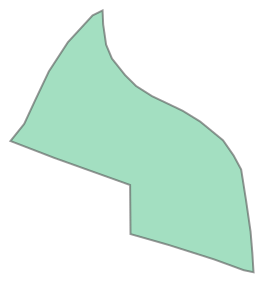

In [44]:
import copy
from arcgis.geometry import Geometry, Polygon
fts_terreno = copy.deepcopy(datosTerreno)
feat_collect = FeatureCollection.from_featureset(fts_terreno)

# create = analysis.aggregate_points()
polygon = Geometry(fts_terreno.features[0].geometry)
polygon

In [77]:
for field in terreno_table.properties["fields"]:
    print(field['name'])

objectid
globalid
name
createdbyrecord
retiredbyrecord
statedarea
statedareaunit
calculatedarea
miscloseratio
misclosedistance
isseed
created_user
created_date
last_edited_user
last_edited_date
Shape__Area
Shape__Length
area_terreno
avaluo_terreno
dimension
etiqueta
relacion_superficie
manzana_vereda_codigo
validationstatus


In [83]:
map4.add_layer(terreno_table,{"renderer":"SimpleRenderer","field":"manzana_vereda_codigo"})
map4

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

## https://developers.arcgis.com/python/guide/advanced-cartography-part1/

In [85]:
from arcgis.gis import GIS
gis = GIS(url='https://pythonapi.playground.esri.com/portal', username='arcgis_python', password='amazing_arcgis_123')
gis.url

'https://pythonapi.playground.esri.com/portal'

In [86]:
map1 = gis.map("USA", 4)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [100]:
from arcgis.features import FeatureLayer
usa_flayer = FeatureLayer("https://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/USA_County_Crops_2007/FeatureServer/0")
print(type(usa_flayer))
map1.add_layer(usa_flayer, { "type": "FeatureLayer",
                             "renderer":"ClassedColorRenderer",
                             "field_name":"M086_07"})

<class 'arcgis.features.layer.FeatureLayer'>


In [93]:
feature_set = usa_flayer.query("FID<=100")
feature_set.sdf.head()

FID     AREA  PERIMETER  AGCENSP020 STATE                 COUNTY   FIPS  \
0    1  0.00003    0.02149         502    AK            Juneau Area  02110   
1    2  0.00017    0.06661         503    AK  Aleutian Islands Area  02010   
2    3  0.00003    0.02353         504    AK  Aleutian Islands Area  02010   
3    4  0.00021    0.06889         505    AK            Juneau Area  02110   
4    5  0.00135    0.17978         506    AK            Juneau Area  02110   

   ST  M003_07  M009_07  ...  M099_07  M090_07  M172_07  M188_07  M193_07  \
0  02       14    29.73  ...   216319        0        0        0        0   
1  02    19817    68.57  ...   110557        0        0        0        0   
2  02    19817    68.57  ...   110557        0        0        0        0   
3  02       14    29.73  ...   216319        0        0        0        0   
4  02       14    29.73  ...   216319        0        0        0        0   

   M217_07  M233_07  M234_07  TotalFarmedAcres  \
0        0        0        0                 0   
1       10        0        0                10   
2       10        0        0                10   
3        0        0        0                 0   
4        0        0        0                 0   

                                               SHAPE  
0  {"rings": [[[-15176096.5064839, 7921583.613428...  
1  {"rings": [[[-16966971.5634053, 7919854.606389...  
2  {"rings": [[[-17284074.9856888, 7918871.408648...  
3  {"rings": [[[-14874869.8715385, 7915589.101788...  
4  {"rings": [[[-15170248.0871, 7910023.20022296]...  

[5 rows x 36 columns]

In [101]:
map2 = gis.map("USA", 4)
map2_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"M086_07",
                 "minValue":-9007199254740991}
map2_renderer["visualVariables"] = [{   "type": "colorInfo",
                                        "field": "M086_07",
                                        "stops": [  {
                                                        "value": 10,
                                                        "color": [237,248,251,204],
                                                        "label": "< 10"
                                                    },
                                                    {
                                                        "value": 25,
                                                        "color": [178,226,226,204],
                                                        "label": "10~39.5"
                                                    },
                                                    {
                                                        "value": 39.5,
                                                        "color": [102,194,164,204],
                                                        "label": "39.5"
                                                    },
                                                    {
                                                        "value": 54,
                                                        "color": [44,162,95,204],
                                                        "label": "39.5~68"
                                                    },
                                                    {
                                                        "value": 68,
                                                        "color": [0,109,44,204],
                                                        "label": "> 68"
                                                    }]
                                    }]

map2_renderer["classBreakInfos"] = [{   "symbol": {
                                            "color": [170,170,170,204],
                                            "outline": {
                                                "color": [153,153,153,255],
                                                "width": 0.375,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            },
                                            "type": "esriSFS",
                                            "style": "esriSFSSolid"
                                        },
                                        "classMaxValue": 9007199254740991
                                    }]

map2.add_layer(usa_flayer,
               { "type": "FeatureLayer",
                 "renderer": map2_renderer,
                 "field_name":"M086_07",
                 "minValue":-9007199254740991,
                 "definitionExpression": "AREA > 0.001"})

map2

MapView(layout=Layout(height='400px', width='100%'))

In [102]:
map3 = gis.map("USA", 4)

map3_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"M188_07",
                 "transparency":20,
                 "minValue":-9007199254740991}

map3_renderer["visualVariables"] = [{   "type": "sizeInfo",
                                        "field": "M188_07",
                                        "valueUnit": "unknown",
                                        "minSize": {
                                            "type": "sizeInfo",
                                            "expression": "view.scale",
                                            "stops": [{     "value": 1128,
                                                            "size": 16
                                                        },
                                                        {   "value": 144447,
                                                            "size": 16
                                                        },
                                                        {   "value": 18489298,
                                                            "size": 4
                                                        },
                                                        {   "value": 147914382,
                                                            "size": 4
                                                        },
                                                        {   "value": 591657528,
                                                            "size": 2
                                                        }]
                                        },
                                        "maxSize": {
                                            "type": "sizeInfo",
                                            "expression": "view.scale",
                                            "stops": [{     "value": 1128,
                                                            "size": 80
                                                        },
                                                        {   "value": 144447,
                                                            "size": 80
                                                        },
                                                        {   "value": 18489298,
                                                            "size": 50
                                                        },
                                                        {   "value": 147914382,
                                                            "size": 50
                                                        },
                                                        {   "value": 591657528,
                                                            "size": 25
                                                        }]
                                        },
                                        "minDataValue": 0,
                                        "maxDataValue": 150000
                                    },
                                    {   "type": "sizeInfo",
                                        "target": "outline",
                                        "expression": "view.scale",
                                        "stops": [{     "size": 2,
                                                        "value": 1080478
                                                    },
                                                    {   "size": 1,
                                                        "value": 6752990
                                                    },
                                                    {   "size": 1,
                                                        "value": 27011958
                                                    },
                                                    {   "size": 0,
                                                        "value": 54023916
                                                    }]
                                    }]

map3_renderer["classBreakInfos"] =     [{   "symbol": {
                                                "color": [227,139,79,255],
                                                "size": 9,
                                                "angle": 0,
                                                "xoffset": 0,
                                                "yoffset": 0,
                                                "type": "esriSMS",
                                                "style": "esriSMSCircle",
                                                "outline": {
                                                    "color": [51,51,51,255],
                                                    "width": 0.75,
                                                    "type": "esriSLS",
                                                    "style": "esriSLSSolid"
                                                }
                                            },
                                            "classMaxValue": 9007199254740991
                                        }]

map3.add_layer(usa_flayer,
               { "type": "FeatureLayer",
                 "renderer":map3_renderer,
                 "field_name":"M188_07"})

map3

MapView(layout=Layout(height='400px', width='100%'))

In [104]:
map4 = gis.map("France", 2)

map4_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"POP2025",
                 "transparency":80,
                 "minValue":-9007199254740991}

map4_renderer["visualVariables"] = [{   "type": "colorInfo",
                                        "field": "POP2025",
                                        "normalizationField": "POP2015",
                                        "stops": [
                                            {   "value": 1.12,
                                                "color": [230,97,1,255],
                                                "label": "< 112%"
                                            },
                                            {   "value": 1.1800000000000002,
                                                "color": [253,184,99,255],
                                                "label": "112% ~ 124%"
                                            },
                                            {   "value": 1.24,
                                                "color": [247,247,247,255],
                                                "label": "124%"
                                            },
                                            {   "value": 1.3,
                                                "color": [178,171,210,255],
                                                "label": "124% ~ 136%"
                                            },
                                            {   "value": 1.36,
                                                "color": [94,60,153,255],
                                                "label": "> 136%"
                                            }]
                                    }]

map4_renderer["classBreakInfos"] = [{   "symbol": {
                                            "color": [170,170,170,255],
                                            "size": 10.5,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": [153,153,153,255],
                                                "width": 0.375,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            }
                                        },
                                        "classMaxValue": 9007199254740991
                                    }]

world_flayer = FeatureLayer("http://services.arcgis.com/nGt4QxSblgDfeJn9/arcgis/rest/services/World_LargestUrbanAreas_fs/FeatureServer/0")

map4.add_layer(world_flayer,
               { "type": "FeatureLayer",
                 "renderer": map4_renderer,
                 "field_name":"POP2025",
                 "normalizationType": "esriNormalizeByField",
                 "normalizationField": "POP2015"})

map4

MapView(layout=Layout(height='400px', width='100%'))

In [105]:
map5 = gis.map("USA", 4)

map5_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "uniqueValue"}

map5_renderer["valueExpression"] = "var fieldNames = [ \"M163_07\", \"M172_07\", \"M193_07\", \"M188_07\", \"M217_07\" ];\
                                    var numFields = 5;\
                                    var maxValueField = null;\
                                    var maxValue = -Infinity;\
                                    var value, i, totalValue = null;\
                                    for(i = 0; i < numFields; i++) {\
                                        value = $feature[fieldNames[i]];\
                                        if(value > 0) {\
                                            if(value > maxValue) {\
                                                maxValue = value;\
                                                maxValueField = fieldNames[i];\
                                            }\
                                            else if (value == maxValue) {\
                                                maxValueField = null;\
                                            }\
                                        }\
                                    }\
                                    return maxValueField;"

transparencyInfo_valueExpression = "var fieldNames = [ \"M163_07\", \"M172_07\", \"M193_07\", \"M188_07\", \"M217_07\" ];\
                                    var numFields = 5;\
                                    var maxValueField = null;\
                                    var maxValue = -Infinity;\
                                    var value, i, totalValue = null;\
                                    for(i = 0; i < numFields; i++) {\
                                        value = $feature[fieldNames[i]];\
                                        if(value > 0) {\
                                            if(value > maxValue) {\
                                                maxValue = value;\
                                                maxValueField = fieldNames[i];\
                                            }\
                                            else if (value == maxValue) {\
                                                maxValueField = null;\
                                            }\
                                        }\
                                        if(value != null && value >= 0) {\
                                            if (totalValue == null) { totalValue = 0; }\
                                            totalValue = totalValue + value;\
                                        }\
                                    }\
                                    var strength = null;\
                                    if (maxValueField != null && totalValue > 0) {\
                                        strength = (maxValue / totalValue) * 100;\
                                    }\
                                    return strength;"

sizeInfo_valueExpression = "var fieldNames = [ \"M163_07\", \"M172_07\", \"M193_07\", \"M188_07\", \"M217_07\" ];\
                            var numFields = 5;\
                            var value, i, totalValue = null;\
                            for(i = 0; i < numFields; i++) {\
                                value = $feature[fieldNames[i]];\
                                if(value != null && value >= 0) {\
                                    if (totalValue == null) { totalValue = 0; }\
                                    totalValue = totalValue + value;\
                                }\
                            }\
                            return totalValue;"

map5_renderer["visualVariables"] = [{   "type": "transparencyInfo",
                                        "valueExpression": transparencyInfo_valueExpression,
                                        "stops": [{ "value": 20,
                                                    "transparency": 85
                                                  },
                                                  { "value": 95,
                                                    "transparency": 0
                                                  }],
                                        "legendOptions": {"title": "Strength of predominance"}
                                    },
                                    {   "type": "sizeInfo",
                                        "valueExpression": sizeInfo_valueExpression,
                                        "valueUnit": "unknown",
                                        "minSize": {
                                            "type": "sizeInfo",
                                            "expression": "view.scale",
                                            "stops": [{ "value": 1128,
                                                        "size": 16
                                                      },
                                                      { "value": 72223,
                                                        "size": 16
                                                      },
                                                      { "value": 9244649,
                                                        "size": 6
                                                      },
                                                      { "value": 147914382,
                                                        "size": 4
                                                      },
                                                      { "value": 591657528,
                                                        "size": 2
                                                      }]
                                        },
                                        "maxSize": {
                                            "type": "sizeInfo",
                                            "expression": "view.scale",
                                            "stops": [{ "value": 1128,
                                                        "size": 80
                                                      },
                                                      { "value": 72223,
                                                        "size": 80
                                                      },
                                                      { "value": 9244649,
                                                        "size": 50
                                                      },
                                                      { "value": 147914382,
                                                        "size": 50
                                                      },
                                                      { "value": 591657528,
                                                        "size": 25
                                                      }]
                                        },
                                        "minDataValue": 50000,
                                        "maxDataValue": 800000,
                                        "legendOptions": { "title": "Sum of categories"}
                                    }]

map5_renderer["uniqueValueInfos"] = [{  "value": "M163_07",
                                        "symbol": {
                                            "color": [255,255,0,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": "White",
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSNull"
                                            }
                                        },
                                        "label": "Corn for grain, harvested acres."
                                    },
                                    {   "value": "M172_07",
                                        "symbol": {
                                            "color": [255,170,0,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": "White",
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSNull"
                                            }
                                        },
                                        "label": "All wheat for grain, harvested acres."
                                    },
                                    {   "value": "M193_07",
                                        "symbol": {
                                            "color": [152,230,0,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": "White",
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSNull"
                                            }
                                        },
                                        "label": "Soybeans for beans, harvested acres."
                                    },
                                    {   "value": "M188_07",
                                        "symbol": {
                                            "color": [255,255,255,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": "White",
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSNull"
                                            }
                                        },
                                        "label": "Upland cotton, harvested acres."
                                    },
                                    {   "value": "M217_07",
                                        "symbol": {
                                            "color": [255,0,0,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": "White",
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSNull"
                                            }
                                        },
                                        "label": "Vegetables, acres harvested for sale."
                                    }]


map5.add_layer(usa_flayer,
               { "type": "FeatureLayer",
                 "renderer": map5_renderer})

map5

MapView(layout=Layout(height='400px', width='100%'))

In [108]:
map6 = gis.map("D. C., USA", 11)

map_url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/"
map6_flayer = FeatureLayer(map_url+str(58))    
map6.add_layer(map6_flayer)    

map6_flayer = FeatureLayer(map_url+str(51))    
map6.add_layer(map6_flayer)    

map6

MapView(layout=Layout(height='400px', width='100%'))

In [112]:
map6_flayer_query = map6_flayer.query("1=1")
print(len(map6_flayer_query.features))
map6_flayer_query.sdf.head()

91


NAME                                            WEB_URL  \
0  Shady Grove  https://www.wmata.com/rider-guide/stations/sha...   
1    Rockville  https://www.wmata.com/rider-guide/stations/roc...   
2    Twinbrook  https://www.wmata.com/rider-guide/stations/twi...   
3     Glenmont  https://www.wmata.com/rider-guide/stations/gle...   
4  White Flint  https://www.wmata.com/rider-guide/stations/whi...   

                                   ADDRESS LINE  \
0      15903 SOMERVILLE DRIVE, DERWOOD, MD  red   
1      251 HUNGERFORD DRIVE, ROCKVILLE, MD  red   
2       1600 CHAPMAN AVENUE, ROCKVILLE, MD  red   
3  12501 GEORGIA AVENUE, SILVER SPRING, MD  red   
4       5500 MARINELLI ROAD, ROCKVILLE, MD  red   

                                       TRAININFO_URL SE_ANNO_CAD_DATA  \
0  https://www.wmata.com/js/nexttrain/nexttrain.h...             None   
1  https://www.wmata.com/js/nexttrain/nexttrain.h...             None   
2  https://www.wmata.com/js/nexttrain/nexttrain.h...             None   
3  https://www.wmata.com/js/nexttrain/nexttrain.h...             None   
4  https://www.wmata.com/js/nexttrain/nexttrain.h...             None   

                                 GLOBALID            GIS_ID  OBJECTID CREATOR  \
0  {4A7BBA5F-D492-4A0F-A81C-50152E80FADF}  MetroStnFullPt_1         1    None   
1  {CC804700-B42E-4F50-BC43-EFEB771B7F92}  MetroStnFullPt_2         2    None   
2  {BEBD5C27-B4A4-4085-B5DD-404E32B2D283}  MetroStnFullPt_3         3    None   
3  {511DB3B0-0EAD-4EF9-A949-84EF64F3DE97}  MetroStnFullPt_4         4    None   
4  {14C07EA2-75C0-4AB0-B6F7-CB297C34D4EE}  MetroStnFullPt_5         5    None   

  CREATED EDITOR EDITED                                              SHAPE  
0     NaT   None    NaT  {"x": -8589927.282891212, "y": 4738865.8433874...  
1     NaT   None    NaT  {"x": -8587867.649331242, "y": 4733758.2479591...  
2     NaT   None    NaT  {"x": -8585050.442811435, "y": 4730624.6022652...  
3     NaT   None    NaT  {"x": -8577563.025576085, "y": 4730526.5556229...  
4     NaT   None    NaT  {"x": -8584161.21202061, "y": 4728572.31007085...

In [113]:
map7 = gis.map("New York City, USA", 11)

map7_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "simple"}

map7_renderer["symbol"] = {     "color": "None",
                                "outline": {
                                    "color": "None",
                                    "width": 0.75,
                                    "type": "esriSLS",
                                    "style": "esriSLSNull"
                                },
                                "type": "esriSFS",
                                "style": "esriSFSSolid"
                            }

map7_f1_layer = FeatureLayer("http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/Census_Counties_20m/FeatureServer/0")
map7.add_layer(map7_f1_layer,
               { "type": "FeatureLayer",
                 "renderer": map7_renderer
                })

map7_f2_layer = FeatureLayer("http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/NY Educational Attainment/FeatureServer/0")
map7.add_layer(map7_f2_layer,
               { "type": "FeatureLayer",
                 "transparency": 75
                })

map7

MapView(layout=Layout(height='400px', width='100%'))

# Query content and layers

## https://developers.arcgis.com/python/guide/accessing-and-creating-content/

## https://support.esri.com/en/Technical-Article/000024383

# Display webmaps, Add content to webmaps and webscenes, Build webmaps

In [44]:
from IPython.display import display
from arcgis.mapping import WebMap

In [45]:
webmap_search = gis.content.search("COVID 19", item_type="Web Map")
webmap_search

[<Item title:"Global COVID Country Confirmed Cases May 2020" type:Web Map owner:bdasc1>,
 <Item title:"Confirmed Covid19 cases in UK - last updated on 17.04.2020 (Please visit https://coronavstats.co.uk/)" type:Web Map owner:chonglappan>,
 <Item title:"COVID-19 Community Resource Map [Live]" type:Web Map owner:rarareines>,
 <Item title:"Spread of confirmed cases of COVID-19 in counties in TN, December 15-22, 2020 as reported by TN Department of Health at https://www.tn.gov/health/cedep/ncov.html" type:Web Map owner:antipovaangela1>,
 <Item title:"COVID-19 SPREAD AW" type:Web Map owner:amandawestman>,
 <Item title:"Peta Sebaran Risiko Covid-19 Kabupaten Kebumen" type:Web Map owner:FajarAniqSafira>,
 <Item title:"Spread of confirmed cases of COVID-19 in counties in TN, November 14-21, 2020 as reported by TN Department of Health at https://www.tn.gov/health/cedep/ncov.html" type:Web Map owner:antipovaangela1>,
 <Item title:"Bivariate Covid-19 Deaths and Poverty" type:Web Map owner:kibrown

In [47]:
ebola_map_item = webmap_search[0]
ebola_map_item

<Item title:"Global COVID Country Confirmed Cases May 2020" type:Web Map owner:bdasc1>

In [7]:
empty_webmap = WebMap()
empty_webmap.layers

[]

In [17]:
ebola_map = WebMap(ebola_map_item)
for layer in ebola_map.layers:
    print(layer.title)
print(dict(ebola_map.definition).keys())
print(ebola_map.basemap)
print(ebola_map.definition.spatialReference)

Ebola Treatment Centers Status
Country Boundaries
OSMAfrica
dict_keys(['operationalLayers', 'baseMap', 'spatialReference', 'version', 'applicationProperties'])
{
  "baseMapLayers": [
    {
      "id": "baseLayer_001",
      "layerType": "ArcGISTiledMapServiceLayer",
      "opacity": 1,
      "visibility": true,
      "url": "http://ebolamaps.who.int/arcgis/rest/services/BASEMAPS/WHO_West_Africa_background_7/MapServer"
    },
    {
      "id": "WHO_West_Africa_reference_7_3888",
      "layerType": "ArcGISTiledMapServiceLayer",
      "isReference": true,
      "opacity": 1,
      "visibility": true,
      "url": "http://ebolamaps.who.int/arcgis/rest/services/BASEMAPS/WHO_West_Africa_reference_7/MapServer"
    },
    {
      "id": "WHO_West_Africa_reference_7_4287",
      "layerType": "ArcGISTiledMapServiceLayer",
      "isReference": true,
      "opacity": 1,
      "visibility": true,
      "url": "http://ebolamaps.who.int/arcgis/rest/services/BASEMAPS/WHO_West_Africa_reference_7/MapServ

In [18]:
ebola_map

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [19]:
webmap_item_properties = {'title':'Ebola incidents and facilities',
                         'snippet':'Map created using Python API showing locations of Ebola treatment centers',
                         'tags':['automation', 'ebola', 'world health', 'python']}
webmap_item_properties

{'title': 'Ebola incidents and facilities',
 'snippet': 'Map created using Python API showing locations of Ebola treatment centers',
 'tags': ['automation', 'ebola', 'world health', 'python']}

In [20]:
webscene_search = gis.content.search("", item_type="Web Scene")
webscene_search

[<Item title:"Britten Wilder-Autobiography of Author Britten Wilder" type:Web Scene owner:brittenwilder>,
 <Item title:"Santa Maria Volcano Data" type:Web Scene owner:RossDonihue>,
 <Item title:"Interesting Places" type:Web Scene owner:dkensok>,
 <Item title:"BAG 3D - Nederland" type:Web Scene owner:Esri_NL_Content>,
 <Item title:"Visualize New Developments" type:Web Scene owner:esri_3d>,
 <Item title:"Berlin, Germany Scene" type:Web Scene owner:esri_3d>,
 <Item title:"Dorchester Avenue Plan Area Boundary" type:Web Scene owner:Learn_ArcGIS>,
 <Item title:"Linz, Austria Scene" type:Web Scene owner:esri_3d>,
 <Item title:"Airflow Globe" type:Web Scene owner:cartogeek>,
 <Item title:"Brest, France Scene" type:Web Scene owner:esri_3d>]

In [34]:
webscene_item = webscene_search[2]
webscene_item

<Item title:"Interesting Places" type:Web Scene owner:dkensok>

In [35]:
from arcgis.mapping import WebScene
webscene_obj = WebScene(webscene_item)
webscene_obj

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'), mode='3D')

In [36]:
webscene_obj.keys()

odict_keys(['operationalLayers', 'baseMap', 'ground', 'heightModelInfo', 'version', 'authoringApp', 'authoringAppVersion', 'presentation', 'initialState', 'spatialReference', 'viewingMode'])

In [37]:
webscene_obj["initialState"]

{'environment': {'lighting': {'datetime': 1426450124000,
   'displayUTCOffset': -8},
  'atmosphereEnabled': True,
  'starsEnabled': True},
 'viewpoint': {'camera': {'position': {'spatialReference': {'latestWkid': 3857,
     'wkid': 102100},
    'x': -13601480.90077368,
    'y': 5820719.675047723,
    'z': 2423.2742257490754},
   'heading': 182.49906564751697,
   'tilt': 83.73152384316909}}}

# Publish and overwrite

In [38]:
gis = GIS("https://pythonapi.playground.esri.com/portal")

In [40]:
tpk_item = gis.content.add({}, data=r'D:\EsriTraining\APIforPython\api_lyr_sym.zip', folder='packages')
tpk_item

RuntimeError: Specify type in item_properties

In [42]:
item_properties = {"snippet":"""This dataset was collected from Utah DOT open data portal.
                            Source URL: <a href="http://udot.uplan.opendata.arcgis.com/
                            datasets/a627bb128ac44767832402f7f9bde909_10">http://udot.uplan.opendata.arcgis.com/
                            datasets/a627bb128ac44767832402f7f9bde909_10</a>""",
                   "title":"Locations of power pedestals collected in 2012",
                   "tags":"opendata"}
item_properties

{'snippet': 'This dataset was collected from Utah DOT open data portal.\n                            Source URL: <a href="http://udot.uplan.opendata.arcgis.com/\n                            datasets/a627bb128ac44767832402f7f9bde909_10">http://udot.uplan.opendata.arcgis.com/\n                            datasets/a627bb128ac44767832402f7f9bde909_10</a>',
 'title': 'Locations of power pedestals collected in 2012',
 'tags': 'opendata'}

# Ejercicios SGC

In [1]:
from sgc import sgccat20lib
sgccat20lib.profile_storaged = "sgc20_sabanalarga"
gis = sgccat20lib.gisLogin()
print(gis.url)

https://arcgis.catasig.com.co/portal/


In [2]:
dictParams = sgccat20lib.ObtenerParametros()
parcel_service = dictParams["PARCEL_SERVICE_NAME"]
gis = sgccat20lib.gisLogin("profile")
ParcelService = gis.content.get(parcel_service)
urlParcelService = ParcelService.url
urlParcelService

'https://arcgis.catasig.com.co/server/rest/services/SERVICIOS/FS_Conservacion_edicion/FeatureServer'

In [3]:
from arcgis.features import FeatureLayer
url_layer_table = "{0}/{1}".format(urlParcelService, sgccat20lib.getLayers()["PREDIO"]["ID"])
table = FeatureLayer(url_layer_table, gis=gis)
#print(table.properties)
feature_set = table.query(
    where="estado_predio='Activo'", out_fields="condicion_predio"
    ,group_by_fields_for_statistics="condicion_predio"
    ,out_statistics=[{"statisticType":"count", "onStatisticField":"condicion_predio", "outStatisticFieldName":"Cantidad"}]
    )
feature_set.sdf

condicion_predio  cantidad  OBJECTID
0           Informal      4378         1
1                NPH     18540         2
2          PH_Matriz        23         3
3  PH_Unidad_Predial        81         4

In [11]:
import pandas as pd

In [30]:
sdf = pd.DataFrame.spatial.from_layer(table)
predios_Activos = sdf[sdf["estado_predio"] == "Activo"]
predios_Activos.groupby(sdf['condicion_predio']).size()

condicion_predio
Informal              4378
NPH                  18540
PH_Matriz               23
PH_Unidad_Predial       81
dtype: int64

In [16]:
predios_Activos['condicion_predio'].unique()

array(['NPH', 'Informal', 'PH_Matriz', 'PH_Unidad_Predial'], dtype=object)

In [50]:
permits_by_status = predios_Activos.groupby(predios_Activos['condicion_predio']).size()
permits_by_status.sort_values(ascending=False, inplace=True)
permits_by_status

condicion_predio
NPH                  18540
Informal              4378
PH_Unidad_Predial       81
PH_Matriz               23
dtype: int64

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

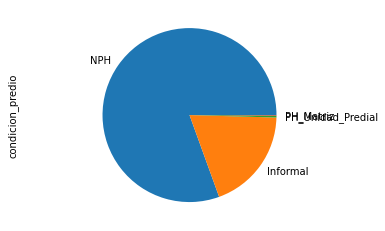

In [29]:
plt.axis('equal') 
permits_by_status.plot(kind='pie', legend=False, label='condicion_predio');

In [48]:
url_layer_table = "{0}/{1}".format(urlParcelService, sgccat20lib.getLayers()["REGISTRO_MUTACIONES"]["ID"])
tableTramites = FeatureLayer(url_layer_table, gis=gis)
sdf = pd.DataFrame.spatial.from_layer(tableTramites)
#filtroTramites = sdf[sdf["estado_predio"] == "Activo"]
sdf.groupby(sdf['tipo_tramite']).size()

tipo_tramite
1    14
3     3
dtype: int64

In [45]:
sdf.groupby(['tipo_tramite', 'tipo_mutacion', 'subtipo_mutacion']).size()

tipo_tramite  tipo_mutacion  subtipo_mutacion
1             2              21                  2
                             22                  2
              3              31                  2
                             32                  2
              5                                  2
dtype: int64

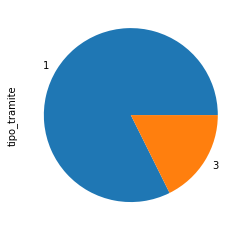

In [53]:
tipoTramite = sdf.groupby(sdf['tipo_tramite']).size()
tipoTramite.sort_values(ascending=False, inplace=True)
tipoTramite
tipoTramite.plot(kind='pie', legend=False, label='tipo_tramite');

# Analyze patterns

In [4]:
gis = GIS("https://arcgis.com", "renemorenow")
#gis = GIS()
gis.url

Enter password: ········


'https://renemorenow.maps.arcgis.com'

<Item title:"chennai-rainfall" type:Feature Layer Collection owner:wfmjr68>
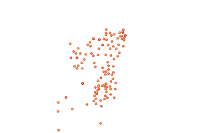

In [5]:
chennai_rainfalls = gis.content.search("Chennai Rain", "Feature Layer", outside_org=True)
chennai_rainfall = chennai_rainfalls[2]
chennai_rainfall

In [6]:
map1 = gis.map("Tamil Nadu", zoomlevel=7)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [8]:
map1.add_layer(chennai_rainfall, { "renderer":"ClassedSizeRenderer", "field_name":"RAINFALL" })

In [ ]:
from arcgis.features.analyze_patterns import interpolate_points

#run the interpolation tool and specify the field containing rainfall data
interpolated_rf = interpolate_points(chennai_rainfall, field='RAINFALL')

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 4

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    s

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\env

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  Fil

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-

    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    s

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  Fil

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    s

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\env

    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    s

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-

    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    s

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  Fil

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    s

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  Fil

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 4

    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  Fil

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 4

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 4

    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-

    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-

    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    s

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\env

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  Fil

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\env

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above excepti

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 

    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1079, in post
    force_bytes=kwargs.pop("force_bytes", False),
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File 

    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1796, in generate_portal_server_token
    path=self._token_url, postdata=postdata, ssl=True, add_token=False
  Fil

    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14193, in _hydrate
    serverUrl=self.url
  File "C:\Program Files\ArcGIS\Pro\bin\Python

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._refresh()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 602, in _refresh
    path=self.url, params=params, token=self._con.token
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 506, in get
    ignore_error_key=ignore_error_key,
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 625, in _handle_response
    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Anonymous access is not allowed.
(Error Code: 499)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Pyth

    self._handle_json_error(data["error"], errorcode)
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 648, in _handle_json_error
    raise Exception(errormessage)
Exception: Unable to generate token.
'token' must be specified in the request, for server token.
(Error Code: 400)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\geoprocessing\_tool.py", line 539, in import_toolbox
    execution_type = tbx.properties.executionType
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14176, in properties
    self._hydrate()
  File "C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\gis\__init__.py", line 14228, in _hydrate
    self._refresh()
  File "C:\Program Files\ArcGIS\Pro

In [ ]:
interpolated_map = gis.map("Tamil Nadu", zoomlevel = 7)
interpolated_map

In [ ]:
interpolated_map.add_layer(interpolated_rf['result_layer'])

# Manage content

In [1]:
from arcgis.gis import GIS
gis = GIS("https://pythonapi.playground.esri.com/portal", "arcgis_python", "amazing_arcgis_123")

In [2]:
volcanoes_item = gis.content.get('452afa4ce761441995cb6d8c69d854d2')
volcanoes_item

In [3]:
volcanoes_item.id

AttributeError: 'NoneType' object has no attribute 'id'

# Clone content

# Create views

In [6]:
from arcgis.features import FeatureLayerCollection
source_search = gis.content.search("world_earthquakes")[0]
source_search
source_flc = FeatureLayerCollection.fromitem(source_search)
source_flc

<FeatureLayerCollection url:"https://pythonapi.playground.esri.com/server/rest/services/Hosted/Earthquakes_around_the_world_from_1800s_to_early_1900s/FeatureServer">

In [ ]:
from arcgis import GIS
from arcgis.features import FeatureLayerCollection
#gis = GIS("https://www.arcgis.com", "username","password")
gis = GIS()

source_search = gis.content.search("world_earthquakes")[0]
source_flc = FeatureLayerCollection.fromitem(source_search)

new_view = source_flc.manager.create_view(name="worldEQView")

view_search = gis.content.search("worldEQView")[0]
view_flc = FeatureLayerCollection.fromitem(view_search)

service_layer = view_flc.layers[0]

update_dict = {"viewDefinitionQuery" : "year_ < 1988"}

service_layer.manager.update_definition(update_dict)

# Perform spatial analysis

In [7]:
import datetime
import arcgis
from arcgis.gis import GIS
from IPython.display import display
import pandas as pd

# create a Web GIS object
gis = GIS('https://pythonapi.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123')

<Group title:"LA County Emergency Management" owner:api_data_owner>
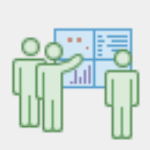

In [8]:
group = gis.groups.search('LA County Emergency Management')[0]
group

<Item title:"Active California Fires" type:Feature Layer Collection owner:api_data_owner>
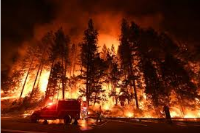

<Item title:"buildings_buffer" type:Feature Layer Collection owner:api_data_owner>
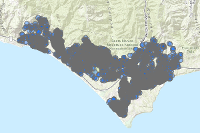

<Item title:"Critical Infrastructure in Southern California" type:Feature Layer Collection owner:api_data_owner>
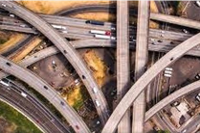

<Item title:"Pix2Pix model predictions on test area" type:Web Map owner:api_data_owner>

<Item title:"webmap_corine_landcover" type:Web Map owner:api_data_owner>
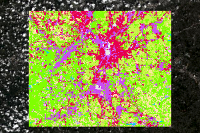

<Item title:"woolsey_building_damage" type:Web Map owner:api_data_owner>
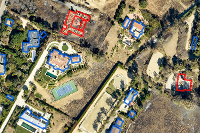

In [9]:
items = group.content()
for item in items: 
    display(item)

In [10]:
m = gis.map('Los Angeles', 9)
m

MapView(layout=Layout(height='400px', width='100%'))

In [11]:
fires = items[0]
print(fires.url)
m.add_layer(fires)

https://pythonapi.playground.esri.com/server/rest/services/Hosted/Active_California_Fires/FeatureServer


In [12]:
infra = items[1]
print(infra.url)
m.add_layer(infra)

https://pythonapi.playground.esri.com/server/rest/services/Hosted/buildings_buffer/FeatureServer


In [14]:
webmapitem = items[2]
print(webmapitem.url)

https://pythonapi.playground.esri.com/server/rest/services/Hosted/Critical_Infrastructure_in_Southern_California/FeatureServer


In [19]:
# create a map of our area of interest
m1 = gis.map('Los Angeles', 9)
m1

MapView(layout=Layout(height='400px', width='100%'))

In [20]:
#add the active fires layer to the map
m1.add_layer(fires)

In [22]:
#add the critical infrastructure layer to the map
m1.add_layer(infra)

In [23]:
from arcgis.features.use_proximity import create_buffers

# buffer the active fire boundaries and add as new content
timestamp = '{:%Y_%m_%d_%H_%M_%S}'.format(datetime.datetime.now())
firebuffers = create_buffers(fires, [4], None, 'Miles', output_name="Fire_Buffers_" + timestamp )

In [28]:
# add risk areas to map
m1.add_layer(firebuffers)

In [29]:
from arcgis.features.manage_data import overlay_layers

# run analysis to determine critical infrastructure within the risk boundaries
riskinfra = overlay_layers(firebuffers, infra, 
                        overlay_type="Intersect",
                        output_name="At_Risk_Infrastructure_" + timestamp)

In [30]:
riskinfra.layers

[<FeatureLayer url:"https://pythonapi.playground.esri.com/server/rest/services/Hosted/At_Risk_Infrastructure_2022_08_28_20_47_47/FeatureServer/0">]

In [31]:
at_risk_facilities  = riskinfra.layers[0]
df = at_risk_facilities.query(as_df=True) # read the returned features as a Pandas dataframe
df

Empty DataFrame
Columns: [objectid, fid_jcedb9fb22c2b42eba248703c13, name, perimeter_, perimeter1, acres, status, containmen, shape_leng, buff_dist, orig_fid, analysisarea, fid_j1abf5954d7a547a09f4260d59c, code, building_i, prediction, shape_leng_1, label, label2, class_ecode, buff_dist_1, orig_fid_1, analysisarea_1, st_area_shape1, st_length_shape1, SHAPE]
Index: []

[0 rows x 26 columns]

In [34]:
# view simplified risk facilities table
if len(df) > 0:
    df1_simplified = df[['name', 'cat1', 'post_id']]
    df1_simplified

# Use Pandas

In [35]:
import pandas as pd

In [36]:
df = pd.read_html("https://en.wikipedia.org/wiki/Number_of_guns_per_capita_by_country")[0]
df.head()

Unnamed: 0 Country or subnational area  \
0         NaN                         NaN   
1         1.0               United States   
2         2.0            Falkland Islands   
3         3.0                       Yemen   
4         4.0               New Caledonia   

   Estimate of civilian firearms per 100 persons Region[3]   Subregion[3]  \
0                                            NaN       NaN            NaN   
1                                          120.5  Americas  North America   
2                                           62.1  Americas  South America   
3                                           52.8      Asia   Western Asia   
4                                           42.5   Oceania      Melanesia   

   Population 2017 Estimate of firearms in civilian possession  \
0              NaN                                         NaN   
1      326474000.0                                   393347000   
2           3000.0                                        2000   
3       28120000.0                                    14859000   
4         270000.0                                      115000   

   Computation method  Registered firearms Unregistered firearms     Notes  
0                 NaN                  NaN                   NaN       NaN  
1                 1.0            1073743.0      392,273,257 Est.  [note 2]  
2                 2.0               1705.0                   295       NaN  
3                 2.0                  NaN                   NaN       NaN  
4                 2.0              55000.0                 60000       NaN

In [37]:
df.dropna(thresh=4, inplace=True)

In [38]:
del df['Unnamed: 0']
del df['Notes']

In [39]:
df.head()

Country or subnational area  Estimate of civilian firearms per 100 persons  \
1               United States                                          120.5   
2            Falkland Islands                                           62.1   
3                       Yemen                                           52.8   
4               New Caledonia                                           42.5   
5                      Serbia                                           39.1   

  Region[3]     Subregion[3]  Population 2017  \
1  Americas    North America      326474000.0   
2  Americas    South America           3000.0   
3      Asia     Western Asia       28120000.0   
4   Oceania        Melanesia         270000.0   
5    Europe  Southern Europe        6946000.0   

  Estimate of firearms in civilian possession  Computation method  \
1                                   393347000                 1.0   
2                                        2000                 2.0   
3                                    14859000                 2.0   
4                                      115000                 2.0   
5                                     2719000                 2.0   

   Registered firearms Unregistered firearms  
1            1073743.0      392,273,257 Est.  
2               1705.0                   295  
3                  NaN                   NaN  
4              55000.0                 60000  
5            1186086.0               1532914

In [40]:
df.iloc[0,1] = 120.5
df.dtypes

Country or subnational area                       object
Estimate of civilian firearms per 100 persons    float64
Region[3]                                         object
Subregion[3]                                      object
Population 2017                                  float64
Estimate of firearms in civilian possession       object
Computation method                               float64
Registered firearms                              float64
Unregistered firearms                             object
dtype: object

In [41]:
converted_column = pd.to_numeric(df["Estimate of civilian firearms per 100 persons"], errors = 'coerce')
df['Estimate of civilian firearms per 100 persons'] = converted_column
df.head()

Country or subnational area  Estimate of civilian firearms per 100 persons  \
1               United States                                          120.5   
2            Falkland Islands                                           62.1   
3                       Yemen                                           52.8   
4               New Caledonia                                           42.5   
5                      Serbia                                           39.1   

  Region[3]     Subregion[3]  Population 2017  \
1  Americas    North America      326474000.0   
2  Americas    South America           3000.0   
3      Asia     Western Asia       28120000.0   
4   Oceania        Melanesia         270000.0   
5    Europe  Southern Europe        6946000.0   

  Estimate of firearms in civilian possession  Computation method  \
1                                   393347000                 1.0   
2                                        2000                 2.0   
3                                    14859000                 2.0   
4                                      115000                 2.0   
5                                     2719000                 2.0   

   Registered firearms Unregistered firearms  
1            1073743.0      392,273,257 Est.  
2               1705.0                   295  
3                  NaN                   NaN  
4              55000.0                 60000  
5            1186086.0               1532914

In [43]:
from arcgis.gis import GIS
import json

gis = GIS()

In [44]:
fc = gis.content.import_data(df, {"CountryCode":"Country__or_dependent_territory__subnational_area__etc__"})

In [49]:
map1 = gis.map('UK')
map1

MapView(layout=Layout(height='400px', width='100%'))

In [50]:
map1.add_layer(fc, {"renderer":"ClassedSizeRenderer",
                    "field_name": "Estimate_of_civilian_firearms_per_100_persons"})
